In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import zipfile

### Задание 1

In [25]:
# Истинные и предсказанные значения
y_true = ['C', 'C', 'C', 'C', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
y_pred = ['C', 'C', 'C', 'C', 'H', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H']

# Количество классов
classes = ['C', 'F', 'H']
num_classes = len(classes)

# Создаем матрицу ошибок (confusion matrix)
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

for i in range(len(y_true)):
    true_idx = classes.index(y_true[i])
    pred_idx = classes.index(y_pred[i])
    confusion_matrix[true_idx][pred_idx] += 1

# Вывод матрицы ошибок
print("Confusion Matrix:")
print("       Predicted")
print("       ", end="")
for c in classes:
    print(f"  {c}", end="")
print()
for i, c in enumerate(classes):
    print(f"Actual {c}  ", end="")
    for j in range(num_classes):
        print(f"{confusion_matrix[i][j]:>4}", end="")
    print()

# Вычисляем точность (accuracy)
correct = sum([confusion_matrix[i][i] for i in range(num_classes)])
total = len(y_true)
accuracy = correct / total

# Вычисляем precision, recall и F1-score для каждого класса
precision = [0] * num_classes
recall = [0] * num_classes
f1_score = [0] * num_classes
support = [0] * num_classes

for i in range(num_classes):
    true_positive = confusion_matrix[i][i]
    false_positive = sum([confusion_matrix[j][i] for j in range(num_classes)]) - true_positive
    false_negative = sum([confusion_matrix[i][j] for j in range(num_classes)]) - true_positive

    precision[i] = true_positive / (true_positive + false_positive)
    recall[i] = true_positive / (true_positive + false_negative)
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    support[i] = np.sum(confusion_matrix[i])

# Вывод результатов метрик
print("\nPRECISION  RECALL  F1-SCORE  SUPPORT")
for i in range(num_classes):
    class_name = classes[i]
    print(f"{class_name}:   {precision[i]:.2f}       {recall[i]:.2f}     {f1_score[i]:.2f}       {support[i]}")

print(f"\nACCURACY: {accuracy:.2f}\n")

# Макро-усреднение (macro average)
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1_score = np.mean(f1_score)
macro_support = np.sum(support)
print(f"MACRO AVG:   {macro_precision:.2f}       {macro_recall:.2f}     {macro_f1_score:.2f}       {macro_support}")

# Взвешенное усреднение (weighted average)
weighted_precision = np.sum([precision[i] * support[i] for i in range(num_classes)]) / total
weighted_recall = np.sum([recall[i] * support[i] for i in range(num_classes)]) / total
weighted_f1_score = np.sum([f1_score[i] * support[i] for i in range(num_classes)]) / total
print(f"WEIGHTED AVG:   {weighted_precision:.2f}       {weighted_recall:.2f}     {weighted_f1_score:.2f}       {total}")


Confusion Matrix:
       Predicted
         C  F  H
Actual C     4   1   1
Actual F     6   2   2
Actual H     3   0   6

PRECISION  RECALL  F1-SCORE  SUPPORT
C:   0.31       0.67     0.42       6
F:   0.67       0.20     0.31       10
H:   0.67       0.67     0.67       9

ACCURACY: 0.48

MACRO AVG:   0.55       0.51     0.47       25
WEIGHTED AVG:   0.58       0.48     0.46       25


### Задание 2 (метрики)

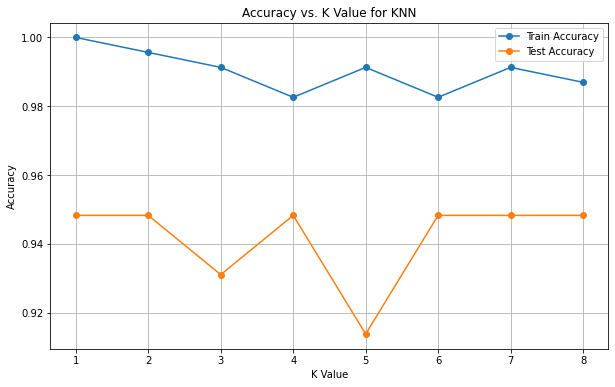

Best K: 1
Precision: 1.0
Recall: 0.9090909090909091
F1 Score: 0.9523809523809523
Confusion Matrix:
[[25  0]
 [ 3 30]]


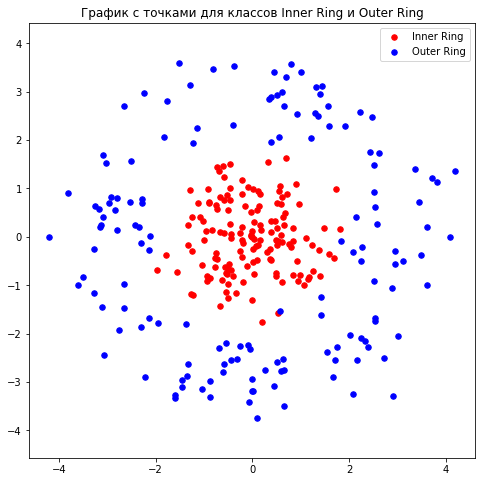

In [26]:
from sklearn.metrics import f1_score, confusion_matrix

# Создаем случайные данные
np.random.seed(0)  # Для воспроизводимости результатов
n_points = np.random.randint(100, 201)  # Случайное количество точек от 100 до 200
outer_radius = 3.0
inner_radius = 1.0

# Генерируем случайные углы для точек внутреннего и внешнего кольца
theta_inner = np.random.uniform(0, 2 * np.pi, n_points)
theta_outer = np.random.uniform(0, 2 * np.pi, n_points)

# Генерируем радиусы точек для внутреннего и внешнего кольца с добавленным шумом
inner_radius_noise = inner_radius + np.random.normal(0, 0.5, n_points)
outer_radius_noise = outer_radius + np.random.normal(0, 0.5, n_points)

# Вычисляем координаты точек внутреннего и внешнего кольца с учетом шума
x_inner = inner_radius_noise * np.cos(theta_inner)
y_inner = inner_radius_noise * np.sin(theta_inner)
x_outer = outer_radius_noise * np.cos(theta_outer)
y_outer = outer_radius_noise * np.sin(theta_outer)

# Создаем метки классов (0 для внутреннего кольца, 1 для внешнего кольца)
labels_inner = np.zeros(n_points)
labels_outer = np.ones(n_points)

# Объединяем данные и метки классов
X = np.concatenate((np.vstack((x_inner, y_inner)).T, np.vstack((x_outer, y_outer)).T))
y = np.concatenate((labels_inner, labels_outer))

# Разделяем данные на тренировочную и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем списки для хранения точности на тренировочной и тестовой выборках
train_accuracy = []
test_accuracy = []

# Задаем диапазон значений k
k_values = range(1, 9)

for k in k_values:
    # Создаем и обучаем модель KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Делаем прогнозы для тренировочной и тестовой выборок
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Вычисляем точность и добавляем ее в списки
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Строим графики точности
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Вычисляем точность, полноту и F1-меру для лучшей модели (например, при лучшем k)
best_k = k_values[np.argmax(test_accuracy)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_test_pred = best_knn.predict(X_test)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Best K: {best_k}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Строим матрицу расхождений
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Построим график с точками для классов
plt.figure(figsize=(8, 8))

# Рисуем точки для внутреннего кольца (красные) и внешнего кольца (синие)
plt.scatter(x_inner, y_inner, c='red', label='Inner Ring', s=30)
plt.scatter(x_outer, y_outer, c='blue', label='Outer Ring', s=30)

# Устанавливаем легенду
plt.legend()

# Отображаем график
plt.axis('equal')
plt.title('График с точками для классов Inner Ring и Outer Ring')
plt.show()


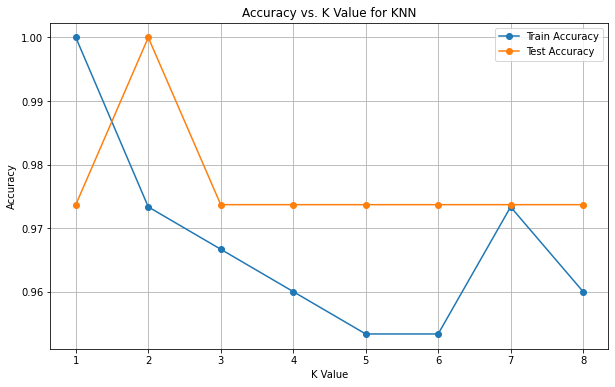

Best K: 2
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[19  0]
 [ 0 19]]


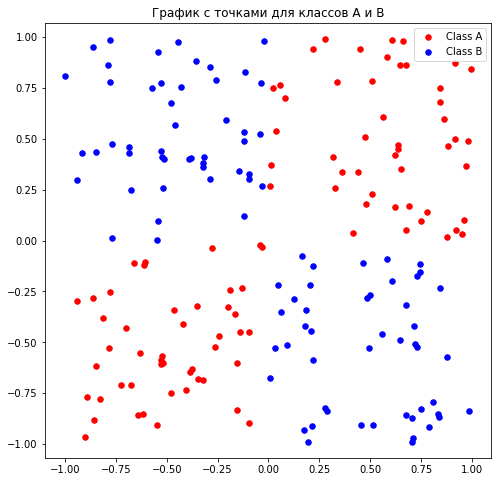

In [27]:
from sklearn.metrics import f1_score, confusion_matrix

# Создаем случайные данные
np.random.seed(0)  # Для воспроизводимости результатов
n_points = np.random.randint(50, 101)  # Случайное количество точек от 50 до 100

# Генерируем случайные координаты для точек класса A и класса B
x_A = np.concatenate((np.random.uniform(-1, 0, n_points // 2), np.random.uniform(0, 1, n_points // 2)))
y_A = np.concatenate((np.random.uniform(-1, 0, n_points // 2), np.random.uniform(0, 1, n_points // 2)))

x_B = np.concatenate((np.random.uniform(-1, 0, n_points // 2), np.random.uniform(0, 1, n_points // 2)))
y_B = np.concatenate((np.random.uniform(0, 1, n_points // 2), np.random.uniform(-1, 0, n_points // 2)))

# Создаем метки классов для класса A (0) и класса B (1)
labels_A = np.zeros(n_points)
labels_B = np.ones(n_points)

# Объединяем данные и метки классов
X = np.vstack((np.vstack((x_A, y_A)).T, np.vstack((x_B, y_B)).T))
y = np.concatenate((labels_A, labels_B))

# Разделяем данные на тренировочную и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем списки для хранения точности на тренировочной и тестовой выборках
train_accuracy = []
test_accuracy = []

# Задаем диапазон значений k
k_values = range(1, 9)

for k in k_values:
    # Создаем и обучаем модель KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Делаем прогнозы для тренировочной и тестовой выборок
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Вычисляем точность и добавляем ее в списки
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Строим графики точности
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Вычисляем точность, полноту и F1-меру для лучшей модели (например, при лучшем k)
best_k = k_values[np.argmax(test_accuracy)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_test_pred = best_knn.predict(X_test)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Best K: {best_k}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Строим матрицу расхождений
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Построим график с точками для классов A и B
plt.figure(figsize=(8, 8))

# Рисуем точки для класса A (красные) и класса B (синие)
plt.scatter(x_A, y_A, c='red', label='Class A', s=30)
plt.scatter(x_B, y_B, c='blue', label='Class B', s=30)

# Устанавливаем легенду
plt.legend()

# Отображаем график
plt.axis('equal')
plt.title('График с точками для классов A и B')
plt.show()


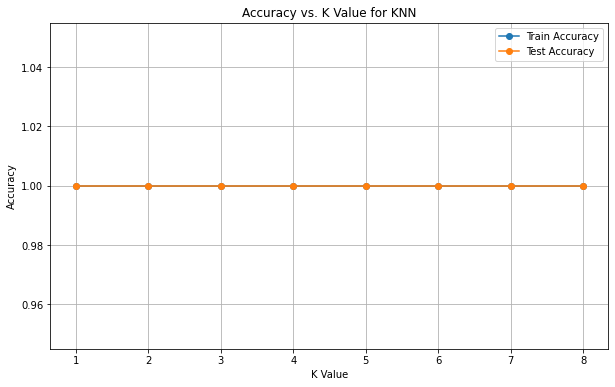

Best K: 1
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[25  0]
 [ 0 33]]


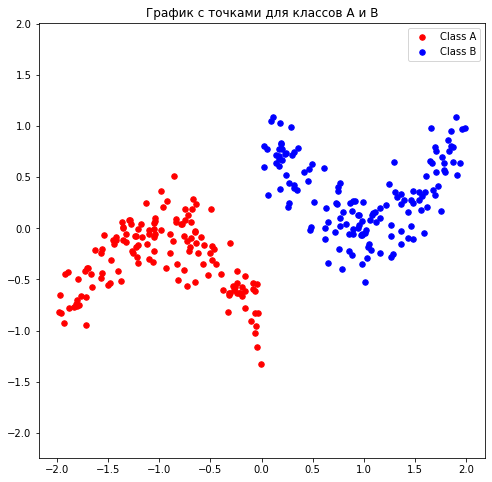

In [28]:
from sklearn.metrics import f1_score, confusion_matrix

# Создаем случайные данные
np.random.seed(0)  # Для воспроизводимости результатов
n_points = np.random.randint(100, 201)  # Случайное количество точек от 100 до 200

# Генерируем случайные координаты для точек класса A (первая парабола)
x_A = np.random.uniform(-2, 0, n_points)  # Сдвигаем параболу влево
y_A = -(x_A + 1)**2 + np.random.normal(0, 0.2, n_points)  # Сдвигаем параболу вверх

# Генерируем случайные координаты для точек класса B (вторая парабола)
x_B = np.random.uniform(0, 2, n_points)
y_B = (-x_B + 1)**2 + np.random.normal(0, 0.2, n_points)


# Создаем метки классов для класса A (0) и класса B (1)
labels_A = np.zeros(n_points)
labels_B = np.ones(n_points)

# Объединяем данные и метки классов
X = np.concatenate((np.vstack((x_A, y_A)).T, np.vstack((x_B, y_B)).T))
y = np.concatenate((labels_A, labels_B))

# Разделяем данные на тренировочную и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем списки для хранения точности на тренировочной и тестовой выборках
train_accuracy = []
test_accuracy = []

# Задаем диапазон значений k
k_values = range(1, 9)

for k in k_values:
    # Создаем и обучаем модель KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Делаем прогнозы для тренировочной и тестовой выборок
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Вычисляем точность и добавляем ее в списки
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Строим графики точности
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Вычисляем точность, полноту и F1-меру для лучшей модели (например, при лучшем k)
best_k = k_values[np.argmax(test_accuracy)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_test_pred = best_knn.predict(X_test)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Best K: {best_k}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Строим матрицу расхождений
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Построим графики с точками для классов A и B
plt.figure(figsize=(8, 8))

# Рисуем точки для класса A (красные) и класса B (синие)
plt.scatter(x_A, y_A, c='red', label='Class A', s=30)
plt.scatter(x_B, y_B, c='blue', label='Class B', s=30)

# Устанавливаем легенду
plt.legend()

# Отображаем график
plt.axis('equal')
plt.title('График с точками для классов A и B')
plt.show()
# гпт подсказал что knn не подходит для парабол, поэтому оставил так, не разобрался чё к чему

### Задание 3. Линейная регрессия

In [29]:
zf = zipfile.ZipFile('archive_real_estate.zip', 'r')
zf.namelist()
with zf.open("realtor-data.csv") as f:
    df = pd.read_csv(f)

In [30]:
df[df['bed'].isna()] = df['bed'].median()               #Clearing the Dataset from Nan's
df[df['bath'].isna()] = df['bath'].median()             #
df[df['acre_lot'].isna()] = df['acre_lot'].median()     #
df[df['house_size'].isna()] = df['house_size'].median() #
df = df.drop('zip_code',axis=1).copy()                  #Dropping zip_code, because it is not worth counting
df = df.drop('prev_sold_date',axis=1).copy()            #Dropping prev_sold_date because it is hard to get from all Nan's in this column
df = df.loc[df['price'] > 15000.0].copy()               #There are many strange filled Series(like status = 0.17 or price = 0.17), and all of them are getting away with this part
df = df.dropna(subset=['city']).copy()  
df = df.drop('status', axis=1).copy()   

# Разделение данных на обучающий и тестовый наборы
features = ['bed', 'bath', 'acre_lot']
target = 'price'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение и оценка линейных регрессионных моделей
best_r2 = -1  # Инициализируем лучший R^2 отрицательным значением
best_feature = None  # Инициализируем переменную для хранения лучшей переменной

for feature in features:
    model = LinearRegression()
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    model.fit(X_train_feature, y_train)
    y_pred = model.predict(X_test_feature)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Переменная: {feature}, R^2: {r2}')
    
    if r2 > best_r2:
        best_r2 = r2
        best_feature = feature

print(f'Лучшая переменная: {best_feature}, Лучший R^2: {best_r2}')


Переменная: bed, R^2: 0.062231381741890246
Переменная: bath, R^2: 0.18174027224278766
Переменная: acre_lot, R^2: 0.0003711618153149354
Лучшая переменная: bath, Лучший R^2: 0.18174027224278766
